In [ ]:
import pandas as pd
import numpy as np

!wget 'https://drive.google.com/uc?id=17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6' -O data.txt
data = np.loadtxt('data.txt')
df = pd.DataFrame(data)
df.head()





--2022-11-17 17:24:27--  https://drive.google.com/uc?id=17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6
Resolving drive.google.com (drive.google.com)... 172.253.122.101, 172.253.122.138, 172.253.122.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vukbdcb5eht5r8md1tpehk7bur3gqfhk/1668705825000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6?uuid=a8cb3764-544a-4a54-8602-e2e191b56192 [following]
--2022-11-17 17:24:28--  https://doc-10-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vukbdcb5eht5r8md1tpehk7bur3gqfhk/1668705825000/14904333240138417226/*/17xDAUwRdJVbpZNi1toPbAQitVrBVHFt6?uuid=a8cb3764-544a-4a54-8602-e2e191b56192
Resolving doc-10-c0-docs.googleusercontent.com (doc-10-c0-docs.googleusercontent.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to d

,0,1,2,3
0,38.0,741.0,2.0,0.0
1,32.0,630.0,11.0,0.0
2,52.0,2730.0,7.0,1.0
3,33.0,552.0,2.0,0.0
4,35.0,409.0,5.0,0.0


In [ ]:
df.columns = ['age', 'sum', 'count', 'is_interested']

# df.head()
avg = df['sum']/df['count']
avg.head()





0    370.500000
1     57.272727
2    390.000000
3    276.000000
4     81.800000
dtype: float64

In [ ]:
df['avg'] = avg.round(1)
df.head()

,age,sum,count,is_interested,avg
0,38.0,741.0,2.0,0.0,370.5
1,32.0,630.0,11.0,0.0,57.3
2,52.0,2730.0,7.0,1.0,390.0
3,33.0,552.0,2.0,0.0,276.0
4,35.0,409.0,5.0,0.0,81.8


In [ ]:
df['level'] = 0
df.head()

,age,sum,count,is_interested,avg,level
0,38.0,741.0,2.0,0.0,370.5,0
1,32.0,630.0,11.0,0.0,57.3,0
2,52.0,2730.0,7.0,1.0,390.0,0
3,33.0,552.0,2.0,0.0,276.0,0
4,35.0,409.0,5.0,0.0,81.8,0


In [ ]:
cond1 = (df['avg'] < 150)
cond2 = (df['avg'] >=150) & (df['avg'] <500)
cond3 = (df['avg'] >=500) & (df['avg'] <750)
cond4 = (df['avg'] >=750) 


df.loc[cond1, 'level'] = 1
df.loc[cond2, 'level'] = 2
df.loc[cond3, 'level'] = 3
df.loc[cond4, 'level'] = 4





In [ ]:
df.head(10)

,age,sum,count,is_interested,avg,level
0,38.0,741.0,2.0,0.0,370.5,2
1,32.0,630.0,11.0,0.0,57.3,1
2,52.0,2730.0,7.0,1.0,390.0,2
3,33.0,552.0,2.0,0.0,276.0,2
4,35.0,409.0,5.0,0.0,81.8,1
5,46.0,1882.0,2.0,1.0,941.0,4
6,28.0,1209.0,5.0,0.0,241.8,2
7,30.0,891.0,8.0,0.0,111.4,1
8,36.0,487.0,5.0,0.0,97.4,1
9,32.0,629.0,4.0,0.0,157.2,2


In [ ]:
# df.sort_values(['count', 'sum']).head()
# df.sort_values(['avg', 'sum']).head()

df.nunique().sort_values()



is_interested     2
level             4
count            10
age              30
avg              96
sum              99
dtype: int64

In [ ]:
df.sort_values(['age', 'avg']).head()

,age,sum,count,is_interested,avg,level
68,14.0,3159.0,2.0,1.0,1579.5,4
70,21.0,2177.0,3.0,1.0,725.7,3
14,23.0,1964.0,2.0,1.0,982.0,4
18,24.0,1811.0,5.0,1.0,362.2,2
52,25.0,1610.0,5.0,1.0,322.0,2


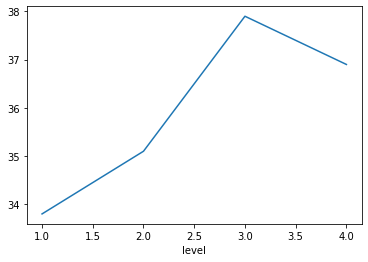

In [ ]:
# df.groupby('level')['avg', 'count'].mean().round(1)
# df.groupby('level').count().round(1)
df.groupby('level')['age'].mean().round(1).plot()



In [ ]:
# df['avg'].hist()
plot(df['avg'], type = 'KDE')




NameError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f263624ef90>,
      dtype=object)

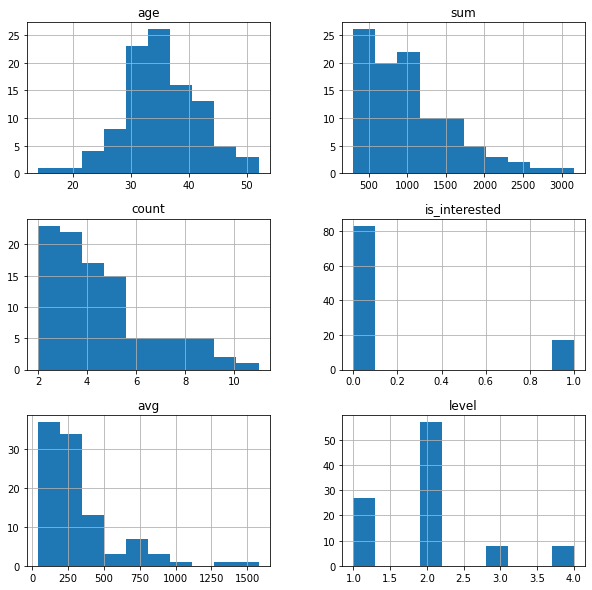

In [ ]:
df.hist(figsize = [10,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f263654b2d0>,
      dtype=object)

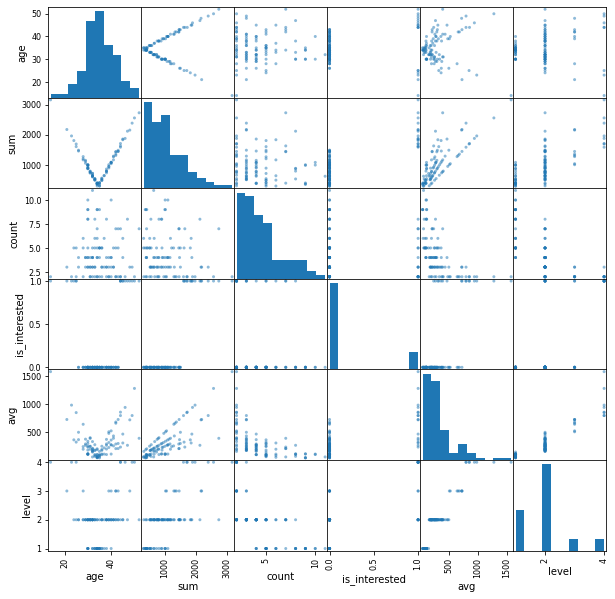

In [ ]:
# df.plot.scatter(x = 'age', y = 'sum', alpha = 0.2)

# df.plot.scatter(x = 'age', y = 'sum', alpha = 0.2)

# from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = [10,10])



In [ ]:
cond = (df['age'] > 16) & (df['age'] < 30) & (df['sum'] > 1500) & (df['level'] == 4) & (df['avg'] > 900) 

# df[cond].groupby('level')['sum', 'age'].mean()

df[cond]




,age,sum,count,is_interested,avg,level
14,23.0,1964.0,2.0,1.0,982.0,4


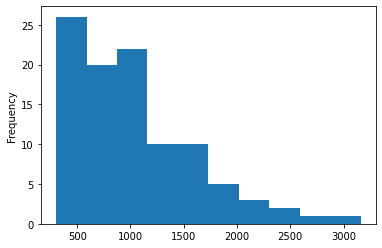

In [ ]:
df['sum'].plot(kind = 'hist')

In [ ]:
condition = df['age'].between([20,30])
df[condition]






TypeError: ignored

In [ ]:
df['level'].value_counts(normalize = True)
# df['level'].nunique()



2    0.57
1    0.27
4    0.08
3    0.08
Name: level, dtype: float64

In [ ]:
# df[['sum', 'age']]
df.corr().round(2)








,age,sum,count,is_interested,avg,level
age,1.00,0.21,-0.00,0.20,0.08,0.16
sum,0.21,1.00,-0.13,0.79,0.78,0.69
count,-0.00,-0.13,1.00,-0.11,-0.55,-0.65
is_interested,0.20,0.79,-0.11,1.00,0.65,0.60
avg,0.08,0.78,-0.55,0.65,1.00,0.90
level,0.16,0.69,-0.65,0.60,0.90,1.00
